In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# pake mse makin rendah makin bagus - penyimpangan dari nilai mean

# Read Data

In [2]:
df = pd.read_csv('mobile_phone_data.csv',delimiter=";")

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,FALSE,2.2,0,1,0,7,0.6,188.0,2,...,20.0,756.0,2549,9,7,19,0,0,True,600
1,1021,TRUE,0.5,1,0,1,53,0.7,136.0,3,...,905.0,1988.0,2631,17,3,7,1,1,False,823
2,563,TRUE,0.5,1,2,1,41,0.9,145.0,5,...,1263.0,1716.0,2603,11,2,9,1,1,False,849
3,615,TRUE,2.5,0,0,0,10,0.8,131.0,6,...,1216.0,1786.0,2769,16,8,11,1,0,False,802
4,1821,TRUE,1.2,0,13,1,44,0.6,141.0,2,...,1208.0,1212.0,1411,8,2,15,1,1,False,584


#Check Data Condition

In [3]:
df.shape

(2000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           1977 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1994 non-null   float64
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      1986 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            2000 non-null   object 
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##Check Null Value

In [6]:
df['blue'].isnull().values.sum()

23

In [7]:
df['mobile_wt'].isnull().values.sum()

6

In [8]:
df['px_height'].isnull().values.sum()

14

In [9]:
df['px_width'].isnull().values.sum()

2

##Check Data Consistency

In [16]:
df['blue'].unique()

array(['FALSE', 'TRUE', nan, '-'], dtype=object)

In [17]:
df['n_cores'].unique()

array(['2', '3', '5', '6', '1', '8', '4', '7', 'three'], dtype=object)

In [18]:
df['ram'].unique()

array(['2549', '2631', '2603', ..., '2032', '3057', '3919'], dtype=object)

In [54]:
df['wifi'].unique()

array([ True, False])

#**Split Data into Train and Test Data**

In [10]:
input_df=df.drop('price_range',axis=1)
output_df=df['price_range']


In [11]:
#Split Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df,output_df, test_size=0.2)

# Cleansing Data

## Casting data type

In [12]:
#convert string to integer
x_train['ram'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '4GB'

In [19]:
x_train[x_train['ram']=='4GB']

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi


In [35]:
x_train['ram'].replace('4GB',4, inplace=True)
x_test['ram'].replace('4GB',4, inplace=True)

<ipython-input-35-5f8d75a37ffa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['ram'].replace('4GB',4, inplace=True)
<ipython-input-35-5f8d75a37ffa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [36]:
x_train['n_cores'].replace('three','3', inplace=True)
x_test['n_cores'].replace('three','3', inplace=True)

<ipython-input-36-e7d23c7b8100>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['n_cores'].replace('three','3', inplace=True)
<ipython-input-36-e7d23c7b8100>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [37]:
#convert string to integer
x_train['ram']=x_train['ram'].astype(str).astype(int)
x_test['ram']=x_test['ram'].astype(str).astype(int)

x_train['n_cores']=x_train['n_cores'].astype(str).astype(int)
x_test['n_cores']=x_test['n_cores'].astype(str).astype(int)


In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1595 to 192
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1579 non-null   object 
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1595 non-null   float64
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1588 non-null   float64
 12  px_width       1599 non-null   float64
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_scree

## Fix consistency data

In [27]:
x_train['blue'].mode()[0]

'FALSE'

In [39]:
x_train['blue'].replace('-',x_train['blue'].mode()[0], inplace=True)
x_test['blue'].replace('-',x_train['blue'].mode()[0], inplace=True)


<ipython-input-39-8ca54df2d4c0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['blue'].replace('-',x_train['blue'].mode()[0], inplace=True)
<ipython-input-39-8ca54df2d4c0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [40]:
x_train['blue'].unique()

array(['FALSE', 'TRUE', nan], dtype=object)

##Missing Value Handling - Numerical Data

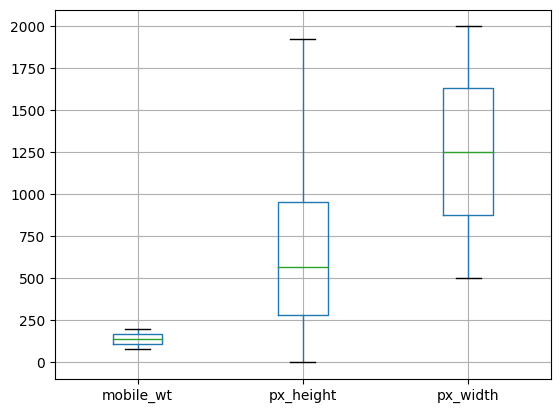

In [41]:
#Check Outliers
boxplot = x_train.boxplot(column=['mobile_wt','px_height','px_width'])
plt.show()

In [42]:
#Calculate Mean for mobile_wt and px_width
print(np.mean(x_train['mobile_wt']))
print(np.mean(x_train['px_width']))

140.01191222570532
1253.1851156973107


In [43]:
#Impute missing value with mean
x_train['mobile_wt'].fillna(140.22, inplace=True)
x_test['mobile_wt'].fillna(140.22, inplace=True)


x_train['px_width'].fillna(1247.27, inplace=True)
x_test['px_width'].fillna(1247.27, inplace=True)

<ipython-input-43-b5410ea280cf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['mobile_wt'].fillna(140.22, inplace=True)
<ipython-input-43-b5410ea280cf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [44]:
x_train['px_height'].median()

564.0

In [46]:
#Impute missing value with mean
x_train['px_height'] = x_train['px_height'].fillna(547)
x_test['px_height'] = x_test['px_height'].fillna(547)

In [47]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1595 to 192
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1579 non-null   object 
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   float64
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   float64
 12  px_width       1600 non-null   float64
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_scree

##Missing Value Handling - Categorical Data

In [48]:
#Find mode of Data Value
import statistics as st

In [49]:
print(st.mode(x_train['blue']))

FALSE


In [50]:
#Impute missing value with mode
x_train['blue'].fillna('FALSE', inplace=True)
x_test['blue'].fillna('FALSE', inplace=True)

<ipython-input-50-327dc607b07c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['blue'].fillna('FALSE', inplace=True)
<ipython-input-50-327dc607b07c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [51]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1595 to 192
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   object 
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   float64
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   float64
 12  px_width       1600 non-null   float64
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_scree

#Feature Engineering

In [53]:
x_train['blue'].unique()

array([0, 1])

In [52]:
#Binary Encoding Categorical to integer

x_train_blue_enc ={"blue": {"TRUE":1,"FALSE" :0}}
x_train=x_train.replace(x_train_blue_enc)

x_test_blue_enc = {"blue": {"TRUE":1,"FALSE" :0}}
x_test=x_test.replace(x_test_blue_enc)

<ipython-input-52-9ec46ecd4a5b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train=x_train.replace(x_train_blue_enc)
<ipython-input-52-9ec46ecd4a5b>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test=x_test.replace(x_test_blue_enc)


In [55]:
df['wifi'].unique()

array([ True, False])

In [58]:
x_train_wifi_enc ={"wifi": {True:1, False :0}}
x_train=x_train.replace(x_train_wifi_enc)

<ipython-input-58-8436588ef771>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train=x_train.replace(x_train_wifi_enc)


In [61]:
x_train['wifi'].unique()

array([1, 0])

In [62]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1595 to 192
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   float64
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   float64
 12  px_width       1600 non-null   float64
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_scree

In [63]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1576 to 941
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  400 non-null    int64  
 1   blue           400 non-null    int64  
 2   clock_speed    400 non-null    float64
 3   dual_sim       400 non-null    int64  
 4   fc             400 non-null    int64  
 5   four_g         400 non-null    int64  
 6   int_memory     400 non-null    int64  
 7   m_dep          400 non-null    float64
 8   mobile_wt      400 non-null    float64
 9   n_cores        400 non-null    int64  
 10  pc             400 non-null    int64  
 11  px_height      400 non-null    float64
 12  px_width       400 non-null    float64
 13  ram            400 non-null    int64  
 14  sc_h           400 non-null    int64  
 15  sc_w           400 non-null    int64  
 16  talk_time      400 non-null    int64  
 17  three_g        400 non-null    int64  
 18  touch_screen

#Data Modelling

In [64]:
#training regression
from sklearn.tree import DecisionTreeRegressor

DT_regression = DecisionTreeRegressor()
DT_regression.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
#testing
y_predict=DT_regression.predict(x_test)

In [66]:
#calculate error for training and testing
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2: ",r2_score(y_predict,y_test))
print("error_test: ",metrics.mean_absolute_error(y_predict,y_test))

R2:  0.8618036754624395
error_test:  63.185


#Hyperparameter Tuning

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['squared_error', 'absolute_error'],
    'max_depth':[2,4,6,8],
}

In [79]:
DT_class2 = DecisionTreeRegressor()
DT_class2= GridSearchCV(DT_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='r2',        # metric for scoring
                            cv=5)

In [80]:
DT_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", DT_class2.best_params_)
print("R2 Score :",DT_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'squared_error', 'max_depth': 6}
R2 Score : 0.8779027086073562
